# Does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch? 

In this guided project, the researchers will seek for the answers for this question. 
<br>To do this, the researchers will be using the data that is gathered by the team at **FiveThirtyEight**.

In [1]:
#importing necessary package to be used
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the necessary data
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")
star_wars_caution = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Cleaning the data 

In [5]:
#Since respondent id is unique identifier, if its **nan** then it needs to be dropped 
star_wars = star_wars.dropna(subset = ["RespondentID"]).copy()

In [6]:
star_wars["RespondentID"].isnull().value_counts()

False    1186
Name: RespondentID, dtype: int64

In [7]:
#Since yes and no is harder to analyze, we will change the yes and no answer into boolean type
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map({"Yes": True, "No": False}).copy()

In [8]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map({"Yes": True, "No" : False}).copy()

In [9]:
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna = False)),star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


(None,
 True     552
 NaN      350
 False    284
 Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64)

In [10]:
#Next we are going to clean the column that is unnamed, since it means that if they have watched the movie, they will check the movie 
for index in range(3,10): 
    star_wars.iloc[:,index] = star_wars.iloc[:,index].apply(lambda x: True if type(x) == str else False).copy()
star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"}, inplace = True)
for num in range(4,9):
    star_wars.rename(columns= {"Unnamed: {}".format(num) : "seen_{}".format(num-2)}, inplace = True)

In [11]:
for index in range(1,7): 
    print(star_wars["seen_{}".format(index)].value_counts())

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


## Analyzing the data 

In [12]:
#Next we are going to clean the next 6 cols which are talking about the rating 
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float).copy()
for index in range(9,15): 
    star_wars["ranking_{}".format(index - 8)] = star_wars[star_wars.columns[index]].copy()

<AxesSubplot:>

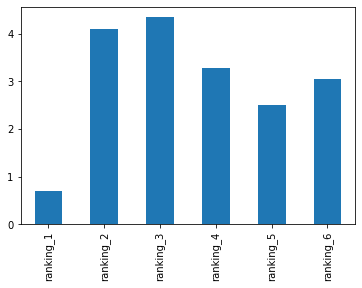

In [13]:
#Now we are going to see the ranking for each movies, the lowest the better
star_wars[["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]].mean().plot.bar()

Based on the data, it is found that Starwars episode 1 have the lowest score which means that it is the best, and then it is followed by the starwars eps 5

<AxesSubplot:>

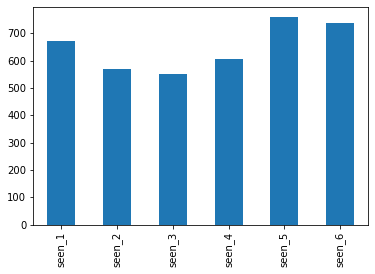

In [14]:
#Now we want to analyze, how many people have seen the movies 
star_wars[["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]].sum().plot.bar()

Based on the data it is found that the number of people watching starwars eps 5 and 6 have the highest numbers 

### Classifying based on the fans preference

In [15]:
#We want to find out which movie is the best depending on whether they feel they are the true fans or not 
true_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True] 
false_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False] 

<AxesSubplot:>

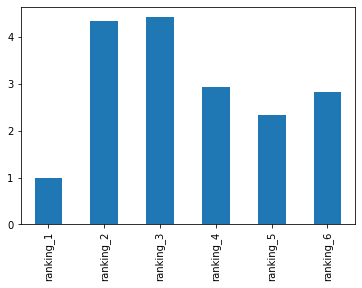

In [16]:
#Which movie they see as the best
true_fans[["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]].mean().plot.bar()

It can be found that from the true fans, the eps 1 is the best followed by the episode 5 

<AxesSubplot:>

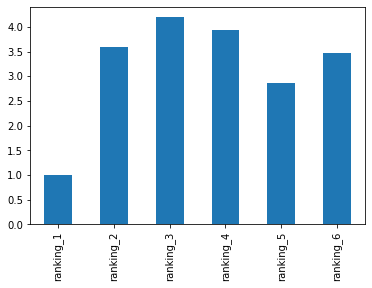

In [17]:
false_fans[["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]].mean().plot.bar()

In terms of false fans, it has the similar ranking with the true_fans

<AxesSubplot:>

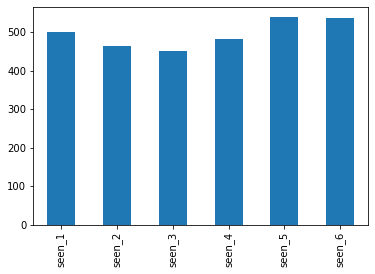

In [18]:
#Numbers of people seeing the star wars movies 
true_fans[["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]].sum().plot.bar()

For the true fans, it can be expected that almost all of them have watched all of the franchise

<AxesSubplot:>

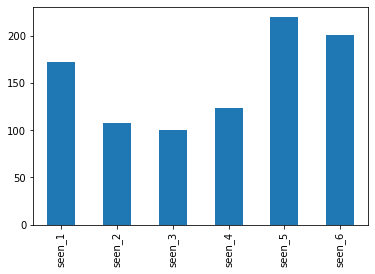

In [19]:
false_fans[["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]].sum().plot.bar()

For the false fans, it seems like, most of them see eps 5 and 6 compare to the other eps 

### Other segment of classification

<AxesSubplot:>

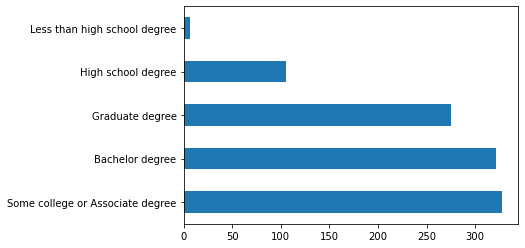

In [20]:
star_wars["Education"].value_counts().plot.barh()

<AxesSubplot:>

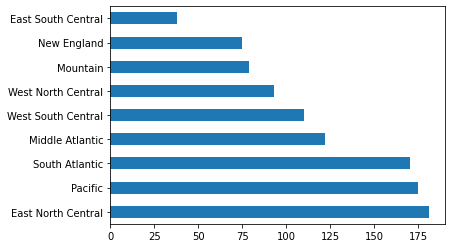

In [21]:
star_wars["Location (Census Region)"].value_counts().plot.barh()

<AxesSubplot:>

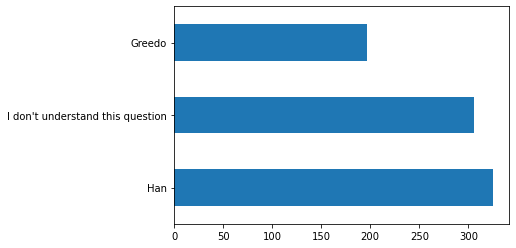

In [22]:
star_wars["Which character shot first?"].value_counts().plot.barh()

### Most Favourite Character 

In [23]:
#Renaming the columns
star_wars[star_wars_caution.iloc[0,15:29]] = star_wars[star_wars.columns[15:29]]

In [24]:
star_wars.columns[45:57]

Index(['Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks',
       'Padme Amidala'],
      dtype='object')

In [25]:
star_wars[star_wars.columns[57]].unique()

array(['Very favorably', nan, 'Unfamiliar (N/A)', 'Somewhat favorably',
       'Very unfavorably', 'Neither favorably nor unfavorably (neutral)',
       'Somewhat unfavorably'], dtype=object)

In [26]:
def changing_words(data):
    if data == "Very favorably": 
        return 5 
    elif data == "Somewhat favorably":
        return 4 
    elif data == "Neither favorably nor unfavorably (neutral)":
        return 3 
    elif data == "Somewhat unfavorably": 
        return 2 
    elif data == "Very unfavorably":
        return 1 
    else: 
        return np.nan

In [27]:
for index in range(45,58):
    star_wars[star_wars.columns[index]]  = star_wars[star_wars.columns[index]].apply(changing_words).copy()

In [28]:
star_wars[star_wars.columns[45:57]].head()

,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala
1,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0
5,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0


<AxesSubplot:>

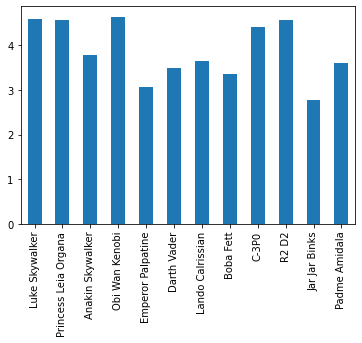

In [37]:
star_wars[star_wars.columns[45:57]].mean().plot.bar()

From the data it can be found that the most favourite charaters are Obi Wan Kenobi, Leia, Luke skywalker and R2D2 